<a href="https://colab.research.google.com/github/javicevallos/Backend/blob/master/Proyecto_3_Javier_Cevallos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------
Proyecto 3  
Integrantes  
- Osvaldo Cubillos  
osvaldo.cubillos@gmail.com

- Javier Ceballos  
javicevallos@gmail.com


Enlace del video:  
https://youtu.be/HEyKZCOVliM

--------------------------


- Generar nuevas variables de valor (De ser necesario)  
1er entregable: Análisis Exploratorio de datos (EDA)   
- Estadística Descriptiva; 
- Incluir la generación de nuevas variables de valor.

# Estadística Descriptiva
## Carga de la data
El archivo con el cual se va a trabajar es `Data_Nutricion_grupos.xlsx` y se comenzará con la importación del archivo de trabajo para posteriormente comenzar el tratamiento de los datos.

In [ ]:
# Importación de archivo usando Pandas
import pandas as pd 
data = pd.read_excel("Data_Nutricion_grupos.xlsx") 
#vizualización de la data
data.head()


,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,...,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Persona 1,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,...,32.0,34.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Persona 2,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,...,15.0,22.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Persona 3,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,...,18.0,17.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Persona 4,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,...,15.0,18.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Persona 5,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,...,20.0,19.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Obteniendo información de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

Como se puede apreciar, la data contiene `652` registros y `23` columnas, dentro de las cuales las últimas 7 no presentan información, por ello, el primer tratamiento consistirá en ajustar el `DataFrame` 

In [ ]:
data = data.iloc[:,0:17] #[todas las filas, desde 0 hasta n-1]
#Visualización de la nueva data
data.head()

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,Persona 1,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A
1,Persona 2,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A
2,Persona 3,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A
3,Persona 4,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A
4,Persona 5,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,30.276688,40.439521,10.0,19.0,20.0,19.0,A


## Datos duplicados
Revisando si existen datos duplicados

In [ ]:
# Verificamos los duplicados
data[data["Individuo"].duplicated()].head()
#No se aprecian datos repetidos para el campo "Individuo"

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos


## Datos perdidos
Revisando si existen datos perdidos en el DataFrame

In [ ]:
data.isna().sum()

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

Como existen datos perdidos, se procederá a graficar las variables con la finalidad de ver qué método de imputación de datos sería más apropiado para el caso

In [ ]:
#Revisando el nombre de las columnas
data.columns

Index(['Individuo', 'talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC',
       'circun_cintura', 'cadera', 'ind_cintura_cadera',
       'ind_cintura_estatura', 'por_grasa_corporal', 'masa_corporal_magra_kg',
       'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS',
       'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO', 'Grupos'],
      dtype='object')

In [ ]:
#Variable a imputar
var_imputacion = ['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC',
       'circun_cintura', 'cadera', 'ind_cintura_cadera',
       'ind_cintura_estatura', 'por_grasa_corporal', 'masa_corporal_magra_kg']

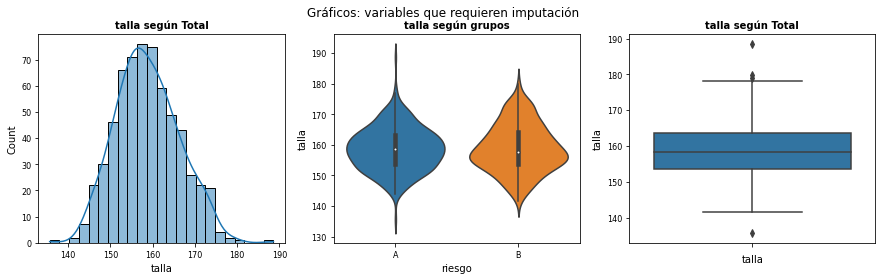

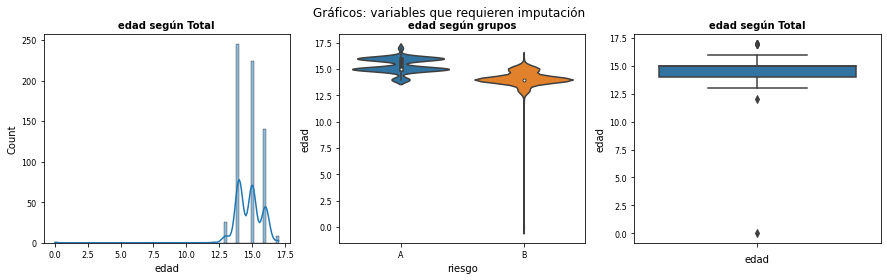

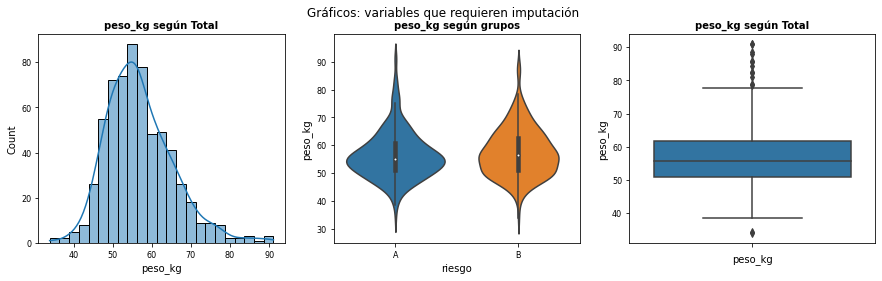

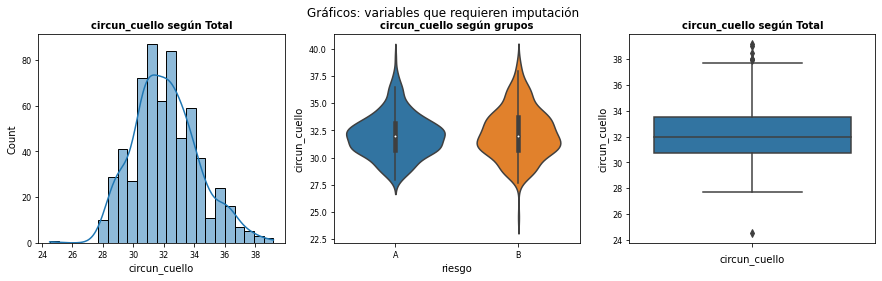

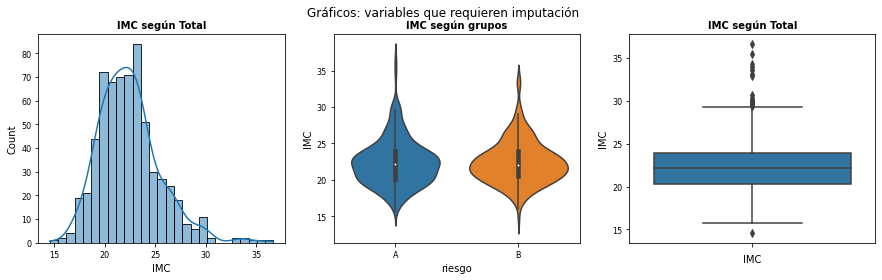

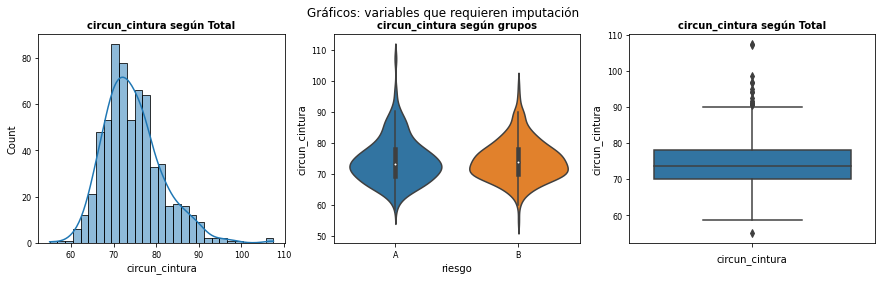

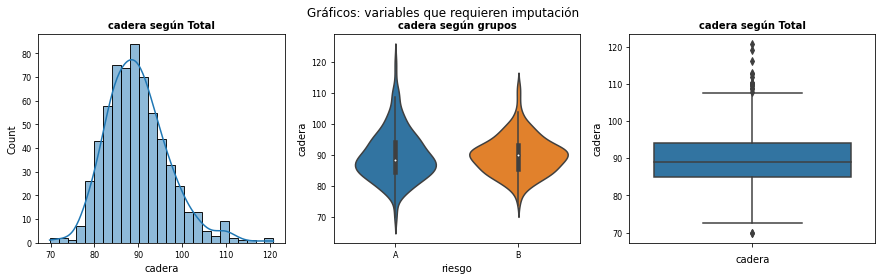

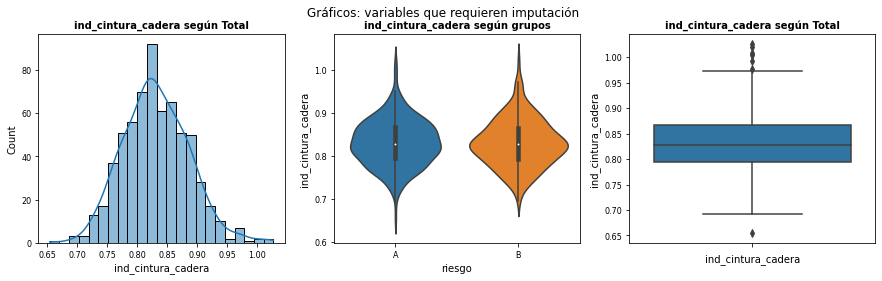

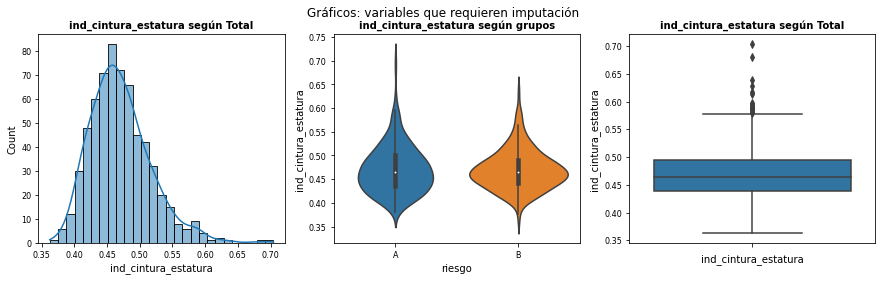

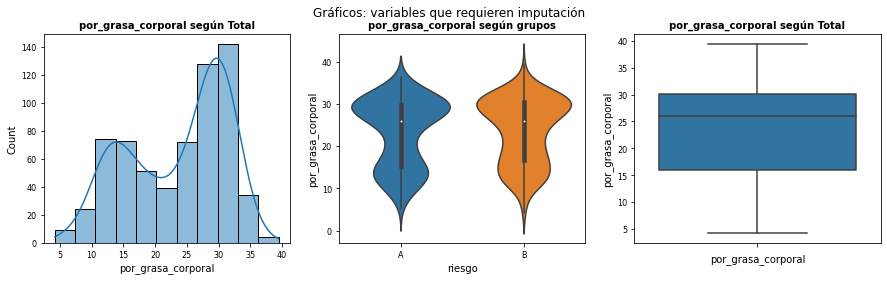

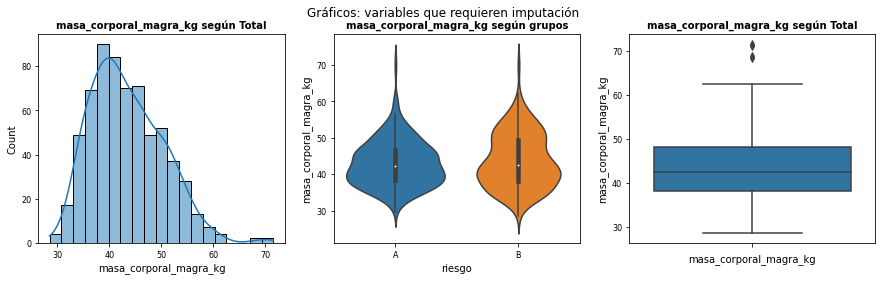

In [ ]:
#Graficando las variables
import seaborn as sns
import matplotlib.pyplot as plt

for i, colum in enumerate(var_imputacion): 
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: variables que requieren imputación')
    sns.histplot(x=colum, data=data, kde= True, ax=ax[0])
    ax[0].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)
    
    sns.violinplot(x = 'Grupos', y = colum,  data  = data, ax=ax[1])
    ax[1].set_title(str(colum) + " según grupos", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel('riesgo')
    
    sns.boxplot(y = colum,  data  = data, ax=ax[2])
    ax[2].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[2].tick_params(labelsize = 8)
    ax[2].set_xlabel(colum)

Como se puede apreciar, algunas variables tienen una distribución con forma normal y muchos de los casos se encuentran valores atípicos, por lo cual el tratamiento de los datos será analizando caso a caso.

## Test de Normalidad
La manera en la cual se podrá saber qué método es mejor para imputar los datos, se utilizará un `Test de Normalidad` para las variables numéricas

**PLANTEAMIENTO DE LAS HIPÓTESIS**  

$H_o$: Los datos estan normalmente distribuidos  
$H_a$: Los datos **no** estan normalmente distribuidos

Nivel de significancia ( $\alpha$ )= 5% (0.05)

Como la cantidad de registros es mayor a 50, se utilizará el `kstest`


In [ ]:
from scipy.stats import kstest  # n > 50
var_num = data.select_dtypes(exclude=['object']).columns
print("La cantidad de variables son "+ str(var_num.shape[0]))

La cantidad de variables son 15


In [ ]:
data2 = data
data2.fillna(data2.mean(), inplace = True)

In [ ]:
var_num

Index(['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura',
       'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura',
       'por_grasa_corporal', 'masa_corporal_magra_kg',
       'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS',
       'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'],
      dtype='object')

In [ ]:
from scipy.stats import kstest  # n > 50

for i in var_num:
    stat2, p2 = kstest(data2[i], 'norm')
    print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2),i)

Estadisticos=1.000, p-value=0.000 talla
Estadisticos=0.998, p-value=0.000 edad
Estadisticos=1.000, p-value=0.000 peso_kg
Estadisticos=1.000, p-value=0.000 circun_cuello
Estadisticos=1.000, p-value=0.000 IMC
Estadisticos=1.000, p-value=0.000 circun_cintura
Estadisticos=1.000, p-value=0.000 cadera
Estadisticos=0.756, p-value=0.000 ind_cintura_cadera
Estadisticos=0.645, p-value=0.000 ind_cintura_estatura
Estadisticos=1.000, p-value=0.000 por_grasa_corporal
Estadisticos=1.000, p-value=0.000 masa_corporal_magra_kg
Estadisticos=0.994, p-value=0.000 pliegue_cutaneo_BICEPS
Estadisticos=1.000, p-value=0.000 pliegue_cutaneo_TRICEPS
Estadisticos=1.000, p-value=0.000 pliegue_cutaneo_ESCAPULAR
Estadisticos=0.999, p-value=0.000 pliegue_cutaneo_SUPRAILIACO


Como cada variable presenta un `p_value` menor que $\alpha=5$%, entonces se **rechaza $H_o$** --> Los datos no distribuyen normal. Ahora bien, si la imputación se realiza con la mediana, entonces se podría comprobar la misma hipótesis.


In [ ]:
data2 = data
data2.fillna(data2.median(), inplace = True)

In [ ]:
from scipy.stats import kstest  # n > 50

for i in var_num:
    stat2, p2 = kstest(data2[i], 'norm')
    print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2),i)

Estadisticos=1.000, p-value=0.000 talla
Estadisticos=0.998, p-value=0.000 edad
Estadisticos=1.000, p-value=0.000 peso_kg
Estadisticos=1.000, p-value=0.000 circun_cuello
Estadisticos=1.000, p-value=0.000 IMC
Estadisticos=1.000, p-value=0.000 circun_cintura
Estadisticos=1.000, p-value=0.000 cadera
Estadisticos=0.756, p-value=0.000 ind_cintura_cadera
Estadisticos=0.645, p-value=0.000 ind_cintura_estatura
Estadisticos=1.000, p-value=0.000 por_grasa_corporal
Estadisticos=1.000, p-value=0.000 masa_corporal_magra_kg
Estadisticos=0.994, p-value=0.000 pliegue_cutaneo_BICEPS
Estadisticos=1.000, p-value=0.000 pliegue_cutaneo_TRICEPS
Estadisticos=1.000, p-value=0.000 pliegue_cutaneo_ESCAPULAR
Estadisticos=0.999, p-value=0.000 pliegue_cutaneo_SUPRAILIACO


Al igual que el caso anterior, todas las variables se **rechaza el $H_0$**

Con lo anterior, y debido a que los datos no tienen distribución normal, se utilizará la imputación por mediana para realizar una descripción de los datos.
Usando la función `describe()`

In [ ]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
talla,652.0,158.821474,7.315332,135.600000,153.800000,158.821474,163.300000,188.600000
edad,652.0,14.753488,1.048593,0.000000,14.000000,15.000000,15.000000,17.000000
peso_kg,652.0,56.943561,8.439777,33.900000,51.200000,56.100000,61.450000,91.100000
circun_cuello,652.0,32.138042,2.108140,24.500000,30.700000,32.100000,33.500000,39.200000
IMC,652.0,22.426463,3.018684,14.537886,20.306828,22.194158,23.855081,36.708603
circun_cintura,652.0,74.517425,6.835841,55.000000,70.000000,73.900000,78.000000,107.500000
cadera,652.0,89.868470,7.182995,69.800000,85.000000,89.000000,94.000000,120.800000
ind_cintura_cadera,652.0,0.831048,0.054172,0.654018,0.795298,0.829268,0.866667,1.026528
ind_cintura_estatura,652.0,0.470617,0.045881,0.362319,0.439406,0.466422,0.493610,0.704411
por_grasa_corporal,652.0,23.538992,7.848680,4.214310,16.127803,26.094372,30.073493,39.445282


Con los resultados anteriores se tiene que existen *652* registros, un promedio para la talla; por ejemplo; de 158,82. Una edad promedio de 14,8 años.
## Coeficientes de Variación

In [ ]:
def coeficiente_variacion(x):
    import numpy as np
    import statistics as stats
    m = stats.mean(x)
    sd = np.std(x)
    return sd/m*100

In [ ]:
data2[var_num].apply(coeficiente_variacion, axis=0).round(2)

talla                           4.60
edad                            7.10
peso_kg                        14.81
circun_cuello                   6.55
IMC                            13.45
circun_cintura                  9.17
cadera                          7.99
ind_cintura_cadera              6.51
ind_cintura_estatura            9.74
por_grasa_corporal             33.32
masa_corporal_magra_kg         15.91
pliegue_cutaneo_BICEPS         61.62
pliegue_cutaneo_TRICEPS        36.35
pliegue_cutaneo_ESCAPULAR      36.87
pliegue_cutaneo_SUPRAILIACO    40.53
dtype: float64

Con el resultado anterior, se puede ver que la mayor dispersión de los datos lo presentan los pliegues cutáneos con valores sobre el 36%. Por otro lado, la menor variación están presentes en las variables de talla, edad, IMC e índices de cintura.

## Dispersión de los datos

In [ ]:
#Graficando las variables
import seaborn as sns
import matplotlib.pyplot as plt


Este punto fue desarrollado con los análisis asociados a las desviaciones estándar y coeficientes de variación

## Correlación entre las variables

<Figure size 432x288 with 0 Axes>

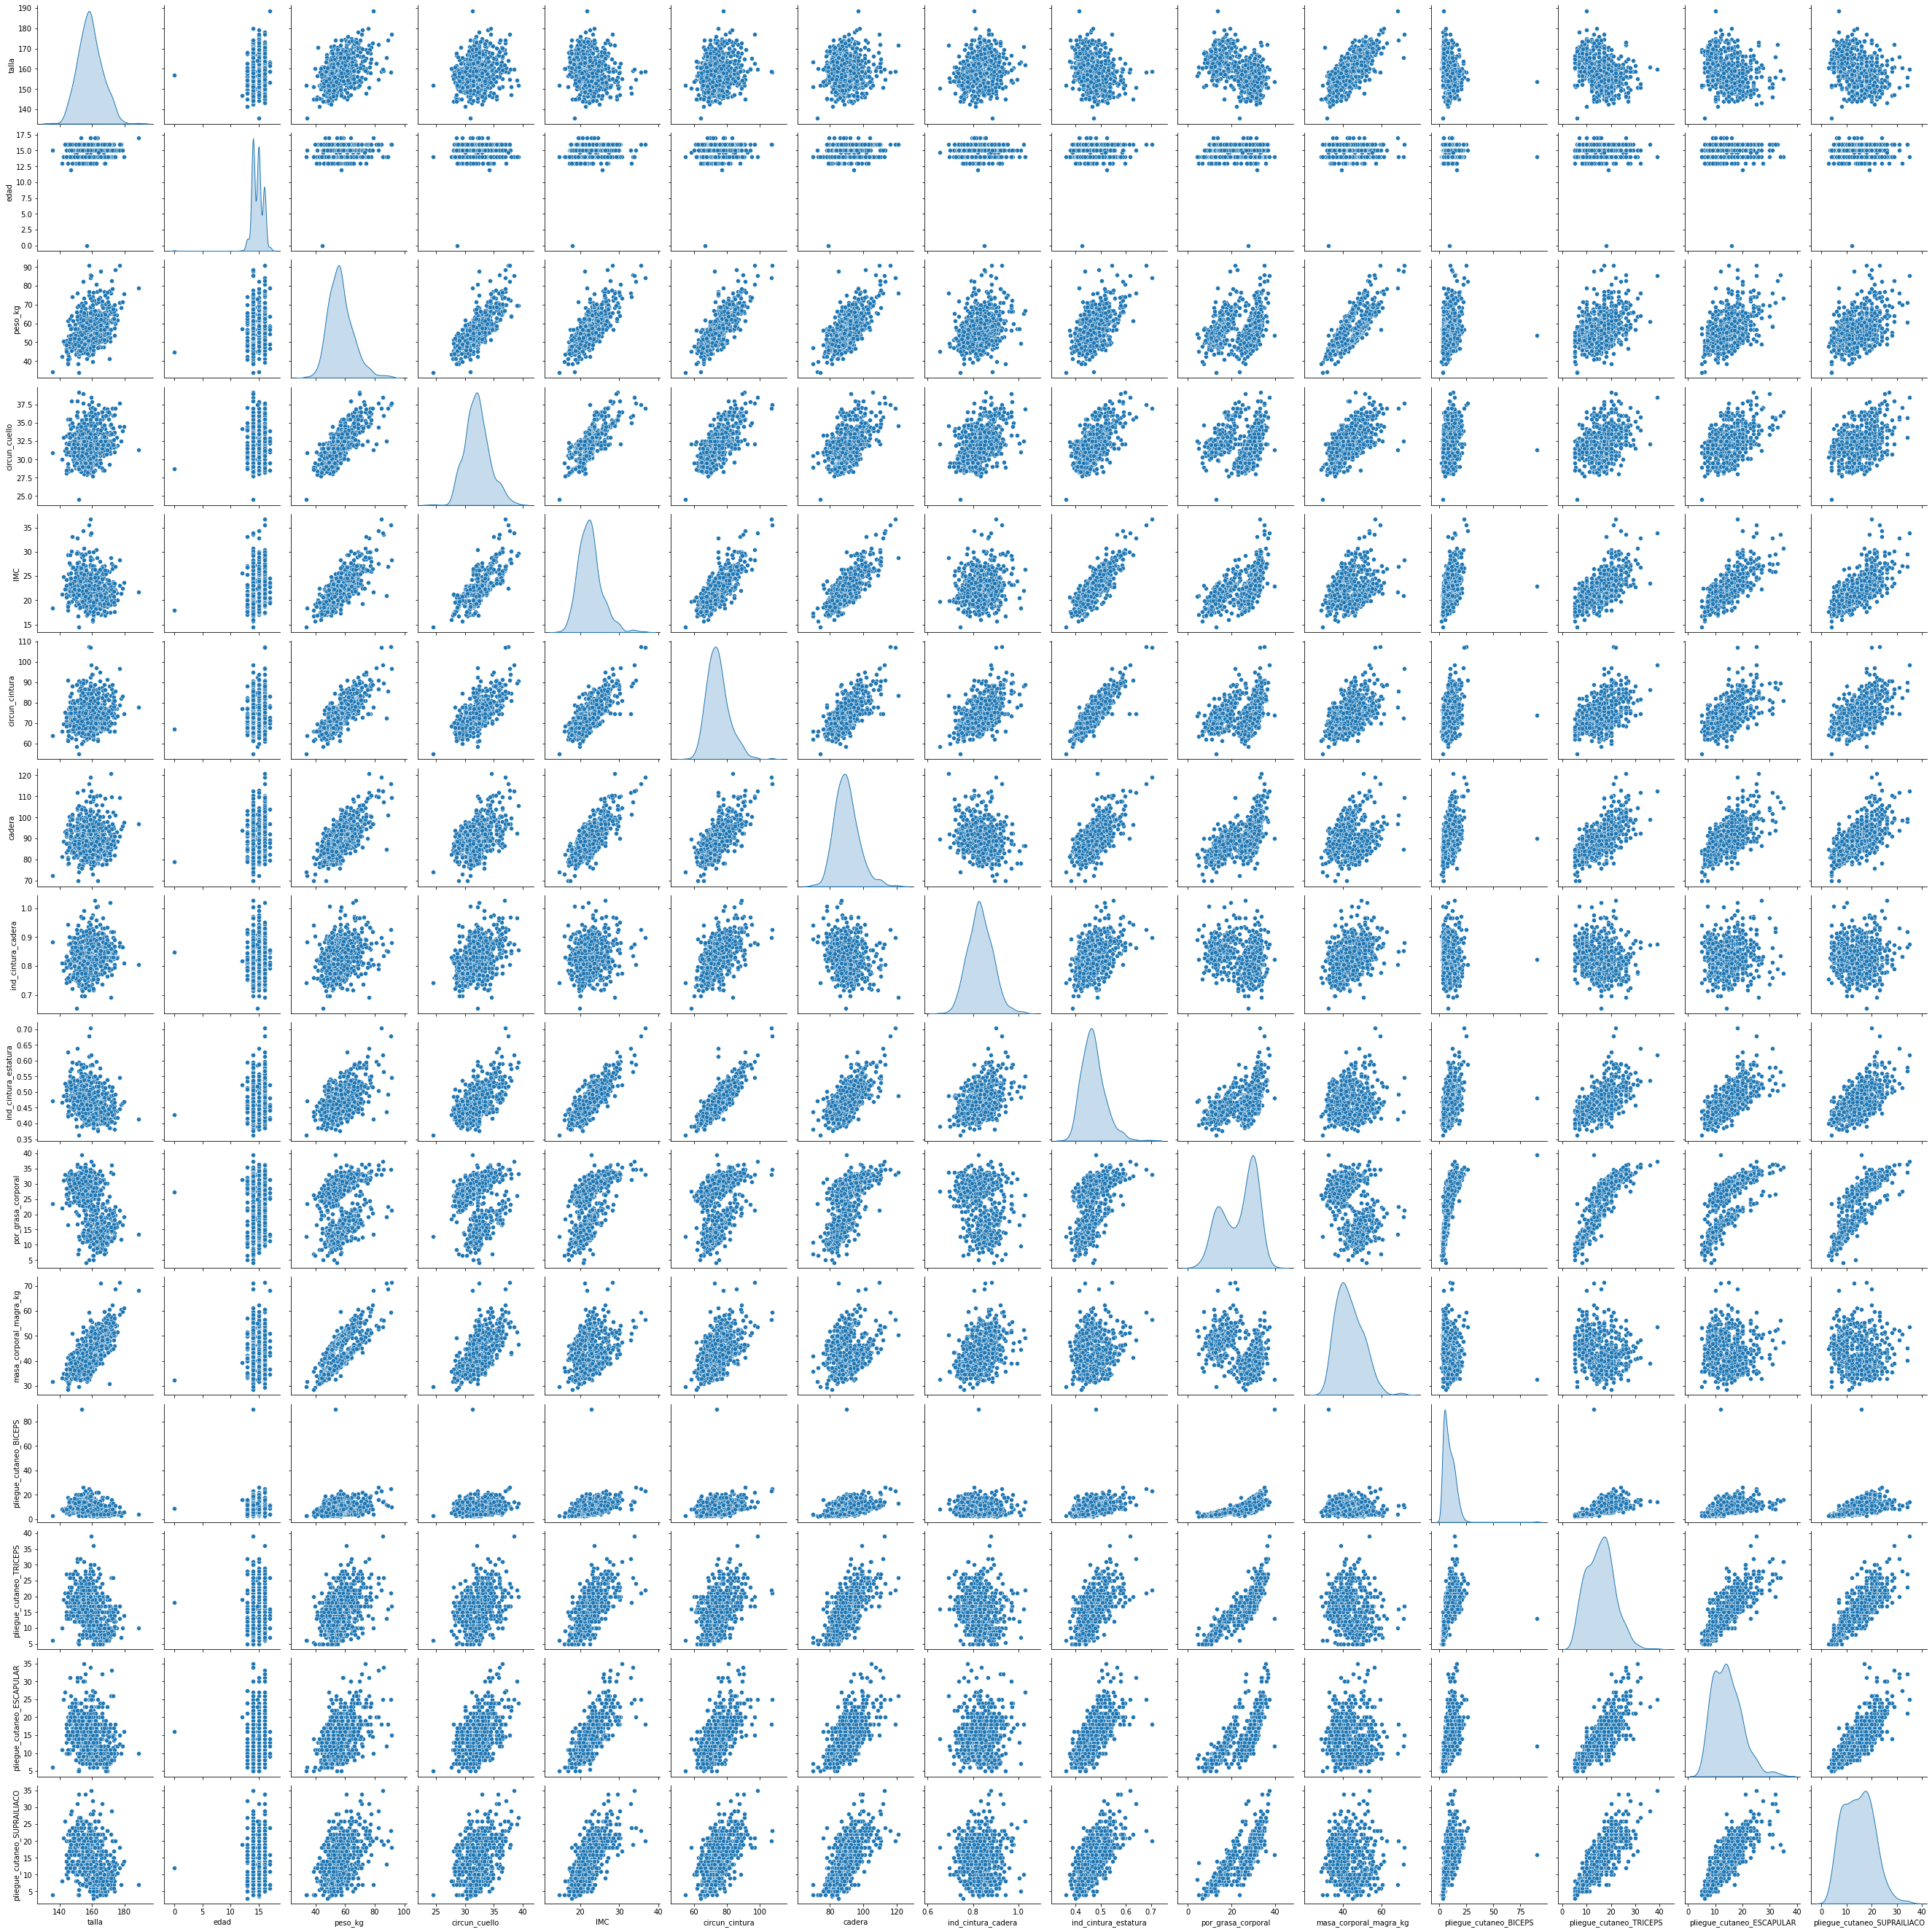

In [ ]:
plt.figure(figsize=(6,4))
sns.pairplot(data[var_num], diag_kind='kde');

Con lo mostrado anteriormente se puede comprobar lo señalado respecto a los coeficientes de variación y la dispersión que presenta la información para algunas variables. Además, es posible visualizar que algunas variables presentan un comportamiento normal pero al realizar los test asociados en las secciones anteriores, se encontró que no era así. 


## Mapa de Correlaciones

Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación de las variables numéricas')

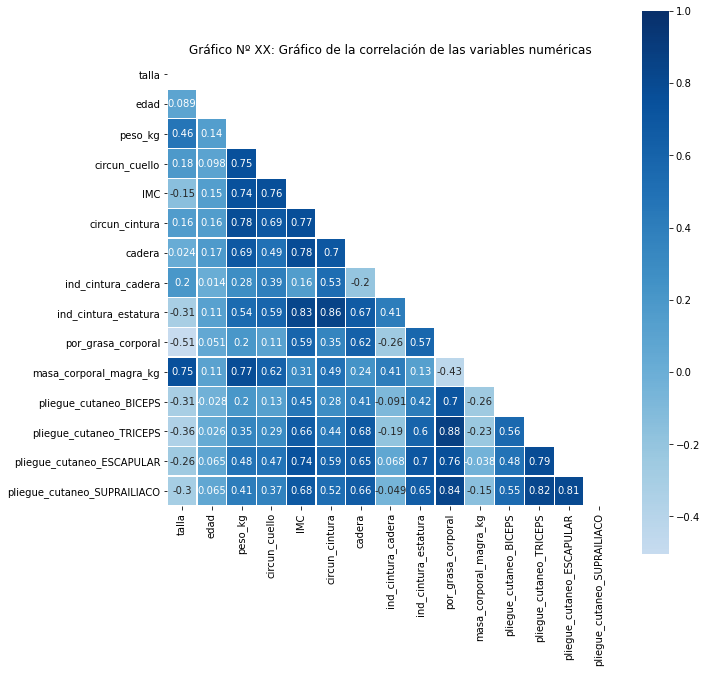

In [ ]:
correlacion = data2[var_num].corr(method='pearson').round(3)
mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0,
square = True, linewidths=.1, annot=True)
g.set_title("Gráfico Nº XX: Gráfico de la correlación de las variables numéricas")

Del gráfico anterior se puede desprender que existen algunas correlaciones entre las variables, por ejemplo el peso tiene correlación similar al 70% para las variables cintura del cuello, IMC, circunferencia de la cintura, masa corporal.

# Estadística inferencial
- 2do entregable: Aplicar Estadística Inferencial 
    - Trabajar hasta con 5 variables (seleccionar las variables a preferencia).
    
En las secciones pasadas se realizó un análisis de normalidad para las variables.

In [ ]:
#DataFrame a trabajar
data2 = data
data2.fillna(data2.median(), inplace = True)

In [ ]:
#Columnas del DataFrame
data2.columns

Index(['Individuo', 'talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC',
       'circun_cintura', 'cadera', 'ind_cintura_cadera',
       'ind_cintura_estatura', 'por_grasa_corporal', 'masa_corporal_magra_kg',
       'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS',
       'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO', 'Grupos'],
      dtype='object')

## Pruebas de correlación de "r pearson"
Planteamiento de hipótesis:

$H_0$: No existe correlacion entre las variables A y B.

$H_a$: Existe correlacion entre las variables A y B.

Nivel de significancia ($\alpha$)= 5%



In [ ]:
for i in var_num:
    for j, colum in enumerate(var_num):
        r, p = pearsonr(data2[i], data2[colum])
        print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p),"Variables", "  x= ", i, "   y= ", str(colum))

Correlación Pearson=1.000, p-value=0.000 Variables   x=  talla    y=  talla
Correlación Pearson=0.089, p-value=0.023 Variables   x=  talla    y=  edad
Correlación Pearson=0.462, p-value=0.000 Variables   x=  talla    y=  peso_kg
Correlación Pearson=0.185, p-value=0.000 Variables   x=  talla    y=  circun_cuello
Correlación Pearson=-0.149, p-value=0.000 Variables   x=  talla    y=  IMC
Correlación Pearson=0.163, p-value=0.000 Variables   x=  talla    y=  circun_cintura
Correlación Pearson=0.024, p-value=0.544 Variables   x=  talla    y=  cadera
Correlación Pearson=0.203, p-value=0.000 Variables   x=  talla    y=  ind_cintura_cadera
Correlación Pearson=-0.307, p-value=0.000 Variables   x=  talla    y=  ind_cintura_estatura
Correlación Pearson=-0.505, p-value=0.000 Variables   x=  talla    y=  por_grasa_corporal
Correlación Pearson=0.748, p-value=0.000 Variables   x=  talla    y=  masa_corporal_magra_kg
Correlación Pearson=-0.307, p-value=0.000 Variables   x=  talla    y=  pliegue_cutaneo

Correlación Pearson=0.202, p-value=0.000 Variables   x=  por_grasa_corporal    y=  peso_kg
Correlación Pearson=0.112, p-value=0.004 Variables   x=  por_grasa_corporal    y=  circun_cuello
Correlación Pearson=0.591, p-value=0.000 Variables   x=  por_grasa_corporal    y=  IMC
Correlación Pearson=0.347, p-value=0.000 Variables   x=  por_grasa_corporal    y=  circun_cintura
Correlación Pearson=0.620, p-value=0.000 Variables   x=  por_grasa_corporal    y=  cadera
Correlación Pearson=-0.256, p-value=0.000 Variables   x=  por_grasa_corporal    y=  ind_cintura_cadera
Correlación Pearson=0.573, p-value=0.000 Variables   x=  por_grasa_corporal    y=  ind_cintura_estatura
Correlación Pearson=1.000, p-value=0.000 Variables   x=  por_grasa_corporal    y=  por_grasa_corporal
Correlación Pearson=-0.434, p-value=0.000 Variables   x=  por_grasa_corporal    y=  masa_corporal_magra_kg
Correlación Pearson=0.705, p-value=0.000 Variables   x=  por_grasa_corporal    y=  pliegue_cutaneo_BICEPS
Correlación Pea

De lo anterior se puede ver que existen correlaciones (p_value > 5%) en, por ejemplo, [talla, cadera], [edad, ind_cintura_cadera], [edad, por_grasa_corporal], [edad, pliegue_cutaneo_BICEPS], entre otras

## Test de Levene

Prueba de igualdad de varianzas

$H_o$: No existen diferencias entre las varianzas / homoscedasticidad (igualdad de varianzas)

$H_a$: Existen diferencias entre las varianzas / no son iguales (homogénea)

In [ ]:
# Extrayendo la data para la prueba: riesgo y score

grupo_1 = data2[data2['Grupos'] =='A']
grupo_2 = data2[data2['Grupos'] =='B']
#Visualización de la data generada
grupo_1.head(4)


,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,Persona 1,155.7,16.0,71.2,35.7,29.576170,90.000000,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A
1,Persona 2,166.5,16.0,61.0,31.8,22.364707,80.900000,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A
2,Persona 3,151.3,16.0,49.1,30.5,21.623567,72.000000,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A
3,Persona 4,151.7,16.0,54.6,32.6,23.117479,74.517425,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A


In [ ]:
grupo_2.head(4)

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
337,Persona 338,153.0,14.0,60.6,31.5,25.332137,75.000000,99.0,0.757576,0.490196,30.869793,41.892905,9.0,24.0,20.0,18.0,B
338,Persona 339,160.0,15.0,55.2,30.5,21.712921,74.517425,93.0,0.806452,0.468750,28.790714,39.307526,14.0,18.0,14.0,15.0,B
339,Persona 340,151.6,15.0,56.2,32.9,24.279280,74.517425,84.8,0.860849,0.481530,28.104004,40.405550,7.0,17.0,18.0,16.0,B
340,Persona 341,150.9,15.0,76.0,35.8,32.892989,74.517425,111.7,0.863921,0.639496,36.446202,48.300886,12.0,32.0,31.0,31.0,B


In [ ]:
from scipy.stats import levene
for i in var_num:
    grupo_x = grupo_1[i]
    grupo_y = grupo_2[i]
    stat, p = levene(grupo_x, grupo_y)
    print('Prueba Igualdad de Varianzas=%.3f, p-value=%.3f' % (stat, p), "Variable=", str(i))

Prueba Igualdad de Varianzas=4.721, p-value=0.030 Variable= talla
Prueba Igualdad de Varianzas=10.625, p-value=0.001 Variable= edad
Prueba Igualdad de Varianzas=2.117, p-value=0.146 Variable= peso_kg
Prueba Igualdad de Varianzas=7.365, p-value=0.007 Variable= circun_cuello
Prueba Igualdad de Varianzas=0.993, p-value=0.319 Variable= IMC
Prueba Igualdad de Varianzas=2.483, p-value=0.116 Variable= circun_cintura
Prueba Igualdad de Varianzas=13.127, p-value=0.000 Variable= cadera
Prueba Igualdad de Varianzas=0.095, p-value=0.758 Variable= ind_cintura_cadera
Prueba Igualdad de Varianzas=7.697, p-value=0.006 Variable= ind_cintura_estatura
Prueba Igualdad de Varianzas=0.223, p-value=0.637 Variable= por_grasa_corporal
Prueba Igualdad de Varianzas=10.533, p-value=0.001 Variable= masa_corporal_magra_kg
Prueba Igualdad de Varianzas=1.830, p-value=0.177 Variable= pliegue_cutaneo_BICEPS
Prueba Igualdad de Varianzas=1.076, p-value=0.300 Variable= pliegue_cutaneo_TRICEPS
Prueba Igualdad de Varianzas=

Si se analiza la homocedasticidad de las variables asociadas a los Grupos A y B se tiene que con un `p-value` < 5% No tienen igual varianza las siguientes variables: `talla`, `edad`, `circun_cuello`, `cadera`, `ind_cintura_estatura`, `masa_corporal_magra_kg` y `masa_corporal_magra_kg`